In [1]:
import dill
import pandas as pd
import numpy as np

In [3]:
body = pd.read_csv('ee_or_matched.csv',index_col=0,dtype=str)

In [22]:
for i in list(set(list(body['convey_text']))):
    if 'CORRECTIVE' not in str(i):
        print(i)

nan
RE-RECORD TO CORRECT THE EXECUTION DATE OF THE 1ST ASSIGNOR LISTED - REEL/FRAME 022051/0795
CORRECTION TO CORRECT SERIAL NUMBER 12/522998 NUMBER SHOULD BE 12622998. PREVIOUSLY RECORDED ON REEL 023551 FRAME 0772.
INVALID ASSIGNMENT, SEE RECORDING ON REEL 010794, FRAME 0950. (RE-RECORD TO CORRECT SERIAL NUMBER ERRONEOUSLY ASSIGNED BY PTO.
RE-RECORD TO CORRECT THE SERIAL NUMBER PREVIOUSLY RECORDED ON REEL 8667, FRAME 0639.
NON-EXCLUSIVE LICENSE
CONFIRMATORY PATENT ASSIGNMENT
RELEASE OF SECURITY INTEREST RECORDED AT REEL 28571, FRAME 0141
CORRECT SERIAL NUMBER ON REEL 011503 FRAME 0778.
ASSIGNMENT OF AN UNDIVIDED, ONE-HALF INTEREST
CORRECTED ASSIGNMENT TO CORRECT THE LAST NAME OF FIRST INVENTOR RECORDED ON REEL 9116, FRAME 322.
ASSIGNMENT #2 OF TWO (2) IDENTICAL ASSIGNMENT DOCUMENTS SEPARATELY RECORDED UNDER SEPARATE RECORDATION COVER SHEETS. TO CORRECT THE EXECUTION DATES OF THE FIRST TWO INVENTOR'S, PREVIOUSLY RECORDED AT REEL 010468 FRAME 0060.
RE-RECORD TO CORRECT SERIAL NUMBER 277

RE-RECORD TO CORRECT THE NAME OF THE FIRST ASSIGNOR ON REEL 012626 FRAME 0439. ASSIGNOR CONFIRMS THE ASSIGNMENT OF THE ENTIRE INTEREST.
CORRECTED CERTIFICATE OF OWNERSHIP & MERGER
CORRECTION TO INVENTOR STEPHEN JOHNSON LOMNES ON REEL AND FRAME 017772/0591
RELEASE OF SECURITY INTEREST IN PATENT COLLATERAL (RELEASES RF 024804/0139)
RE-RECORD TO CORRECT ASSIGNOR'S NAME ON AN ASSIGNMENT DOCUMENT PREVIOUSLY RECORDED ON REEL 013739 FRAME 0831. (ASSIGNMENT OF ASSIGNOR'S INTEREST)
SEE RECORDING AT REEL 010511, FRAME 0946. (RE-RECORD TO CORRECT THE NUMBER OF MICROFILM PAGES FROM 2 TO 3)
CORRECT RECEIVING PARTY NAME AND ADDRESS ON REEL 015247/FRAME 0115
CORRECTED NOTICE OF RECORDATION AT REEL 015274 FRAME 0078.
MERGER (SEE DOCUMENT FOR DETAILS). EFFECTIVE: MARCH 16, 1988, MASSACHUSETTS
RE-RECORD TO CORRECT THE 2ND CONVEYING PARTY'S NAME, PREVIOUSLY RECORDED AT REEL 013410, FRAME 0771.
CROSS-REFERENCE OF ASSIGNMENT FILED IN UNITED STATES APPLICATION NO. 09/191,757 RECORDED ON JANUARY 19, 1999 AT 

In [11]:
no_nan['or_ticker'] = no_nan.or_name_matched.map(dictionary)
no_nan['or_ticker'] = [name.replace('[','').replace(']','').replace('\'','') for name in list(no_nan['or_ticker'].map(str))]
data_for_vect=no_nan[['exec_dt','ee_ticker','or_ticker','convey_text']]
ticker_list = list(set(list(no_nan['or_ticker'])))

In [171]:
'TSRO' in list(company_list['Symbol'])

True

In [104]:
data_for_vect.groupby('or_ticker').count().sort_values(by='ee_ticker', ascending=False).head(10)

,exec_dt,ee_ticker,convey_text
or_ticker,,,
IBM,1255,1255,1254
HRS,1093,1093,1093
GE,526,526,526
nan,402,402,402
LSI,400,400,400
CY,249,249,249
IOTS,228,228,228
ATML,198,198,198
AMCC,174,174,174


In [172]:
i =0
for name in ticker_list:
    i+=1
    if 'SCMP' in name:
        print(i)

In [178]:
ticker_list[10]

'IBM'

In [49]:
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import requests
%matplotlib notebook

In [205]:
i = 10
tickertest=data_for_vect[data_for_vect['or_ticker']== ticker_list[i]]
label = company_list[company_list['Symbol']==ticker_list[i]]['Name']

# USE "qopts.export=true&"
url = 'https://www.quandl.com/api/v3/datatables/WIKI/PRICES.json?ticker={}&qopts.columns=date,close&api_key=DotxFs2bJksfE6SfssR4'.format(ticker_list[i])

api_url = "https://www.quandl.com/api/v3/datatables/WIKI/PRICES.json?\
ticker=IBM&qopts.columns=date,close,adj_close,open,adj_open\
&api_key=DotxFs2bJksfE6SfssR4"

session = requests.Session()
session.mount('http://', requests.adapters.HTTPAdapter(max_retries=3))
raw_data = session.get(api_url)
txt = raw_data.json()

pattime = list(tickertest.sort_values('exec_dt')['exec_dt'])
date_pat = pd.to_datetime(pattime)
patassign = [1]*len(pattime)

data_raw = txt['datatable']['data']
data = pd.DataFrame(data_raw, columns=['Date', 'Close', 'Adj. Close', 'Open', 'Adj. Open'])
data = data.sort_values("Date", ascending=False)

date = pd.to_datetime(data['Date'])


In [208]:
api_url = 'https://www.quandl.com/api/v1/datasets/WIKI/{}.json?api_key=DotxFs2bJksfE6SfssR4'.format(ticker_list[i])
session = requests.Session()
session.mount('http://', requests.adapters.HTTPAdapter(max_retries=3))
raw_data = session.get(api_url)
txt = raw_data.json()

col = txt['column_names']
data_raw = txt['data']
data = pd.DataFrame(data=data_raw, columns=col)[['Date', 'Close', 'Adj. Close', 'Open', 'Adj. Open']]
data = data.sort_values("Date", ascending=False)

dates = pd.to_datetime(data['Date'])

In [211]:
# data

<IPython.core.display.Javascript object>


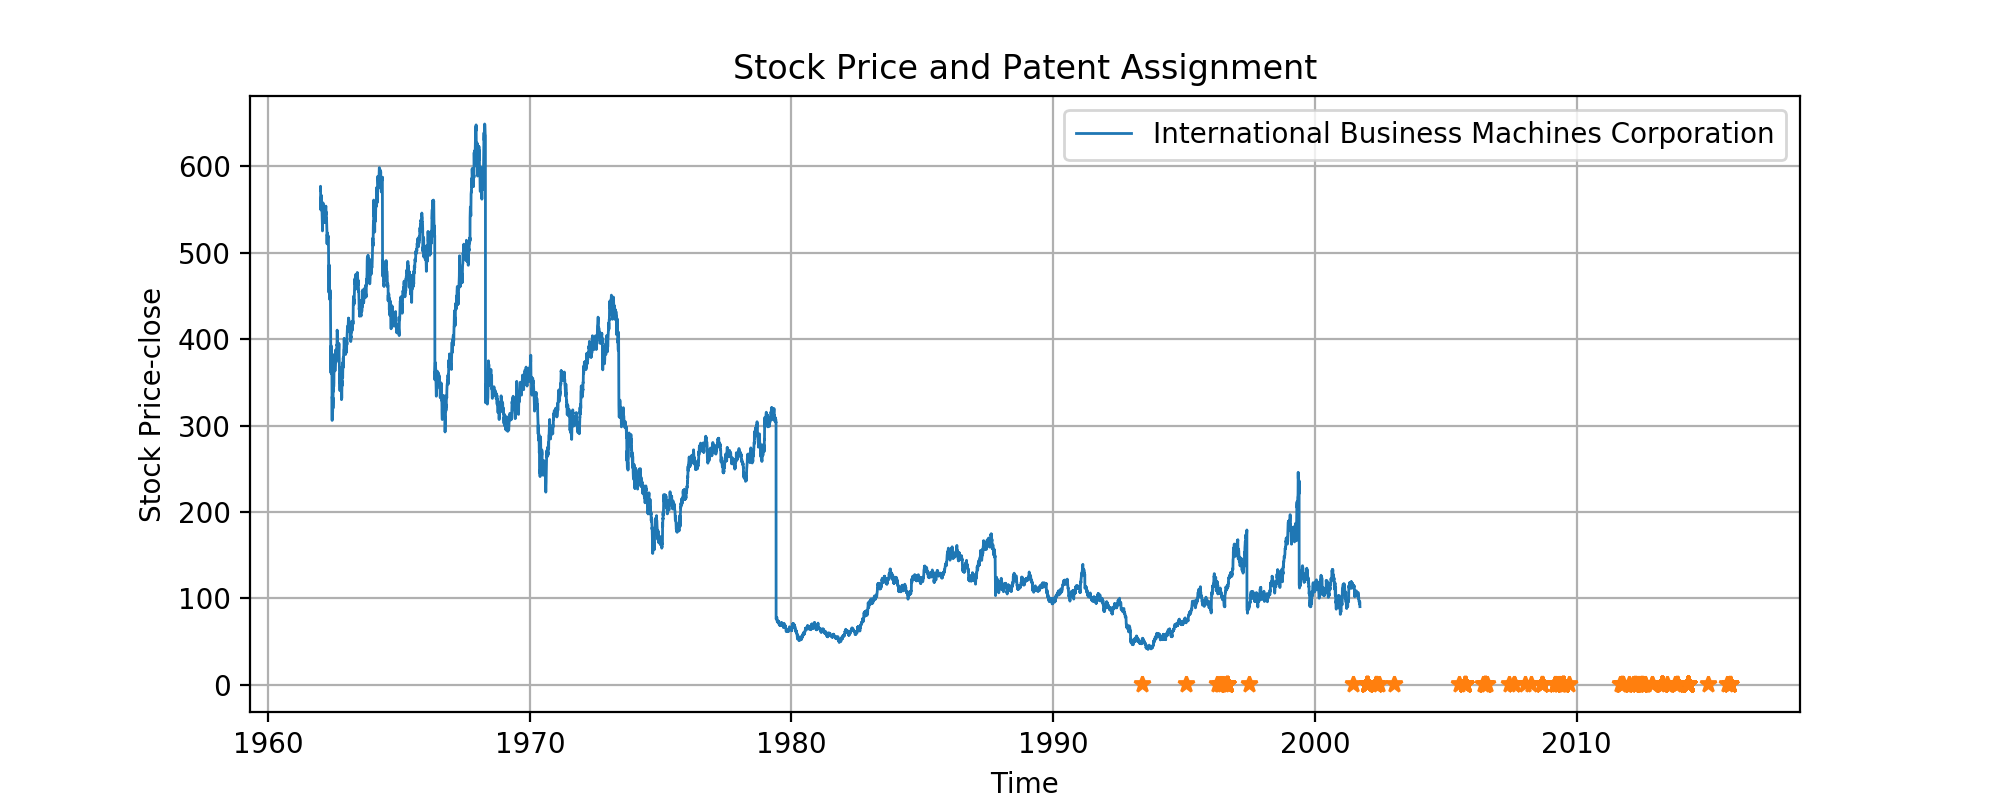

In [163]:
plt.figure(figsize=(10,4))
plt.plot_date(date, data['Close'],'-',linewidth=1)
plt.plot_date(date_pat, patassign, '*')
plt.legend(list(label))
plt.grid('on')
plt.xlabel('Time')
plt.ylabel('Stock Price-close')
plt.title('Stock Price and Patent Assignment')
plt.show()

In [158]:
list(label)[0]

'Amphenol Corporation'

<IPython.core.display.Javascript object>


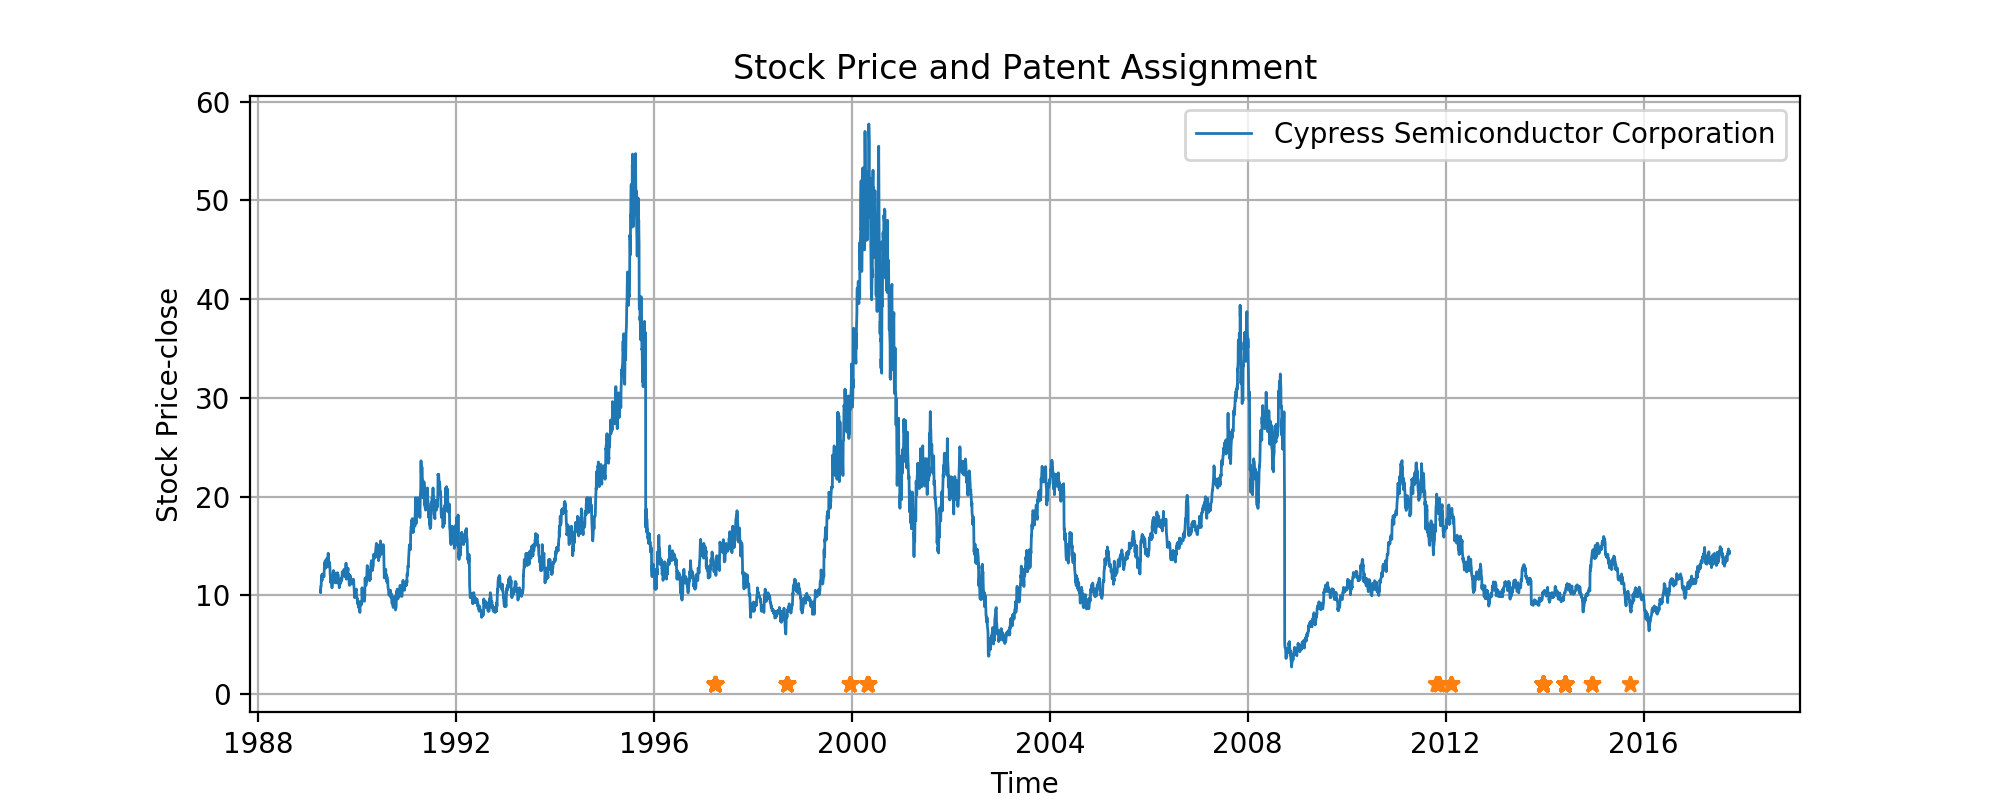

In [156]:
plt.figure(figsize=(10,4))
plt.plot_date(date, data['Close'],'-',linewidth=1)
plt.plot_date(date_pat, patassign, '*')
plt.legend([list(label)[0]])
plt.grid('on')
plt.xlabel('Time')
plt.ylabel('Stock Price-close')
plt.title('Stock Price and Patent Assignment')
plt.show()

<IPython.core.display.Javascript object>


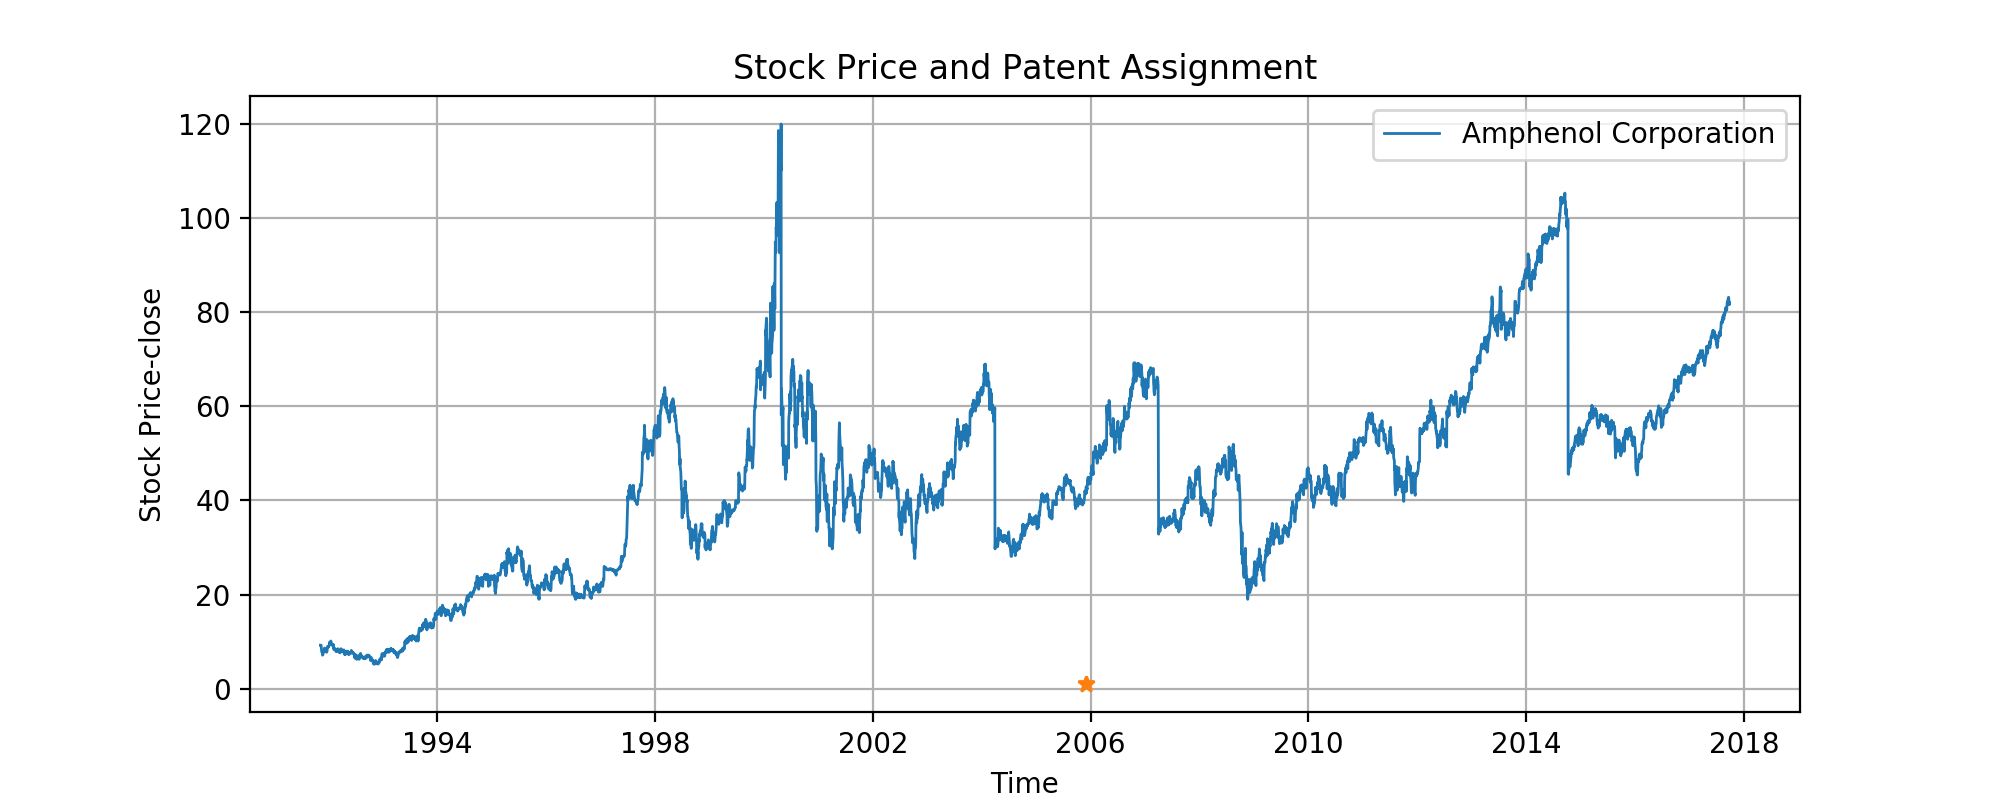

In [159]:
plt.figure(figsize=(10,4))
plt.plot_date(date, data['Close'],'-',linewidth=1)
plt.plot_date(date_pat, patassign, '*')
plt.legend([list(label)[0]])
plt.grid('on')
plt.xlabel('Time')
plt.ylabel('Stock Price-close')
plt.title('Stock Price and Patent Assignment')
plt.show()